In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
import io
import pandas as pd
import numpy as np
df2 = pd.read_csv('train.csv')

In [ ]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Finding and filling null values**

In [ ]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df2['Age'].fillna(0,inplace=True) 
df2['Age'].astype(int).mean()

23.783389450056116

In [ ]:
df2['Age']=df2['Age'].replace(to_replace=0,value=24)

In [ ]:
df2.drop(columns=['Cabin'],inplace=True)

In [ ]:
df2['Embarked'].fillna(0,inplace=True)
df2['Embarked'].astype(str).mode()

0    S
dtype: object

In [ ]:
df2['Embarked']=df2['Embarked'].replace(to_replace='0',value='S')

In [ ]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df2['Embarked']=df2['Embarked'].astype(str)

In [ ]:
df2['Age'].min()

0.42

In [ ]:
df2['Fare'].astype(float)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

**Removing the outliers**



In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


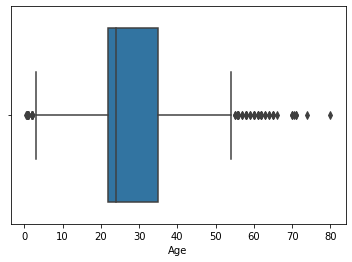

In [ ]:
sns.boxplot(df2['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


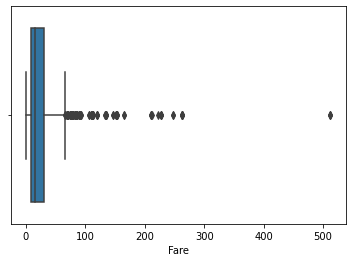

In [ ]:
sns.boxplot(df2['Fare'])

In [ ]:
q1 = df2['Age'].quantile(0.25)

In [ ]:
q3 = df2['Age'].quantile(0.75)

In [ ]:
iqr=q3-q1

In [ ]:
minimum = q1-(1.5*iqr)
minimum

2.5

In [ ]:
maximum = q3+(1.5*iqr)
maximum

54.5

In [ ]:
df2=df2[(df2['Age']<54)]

In [ ]:
qq1=df2['Fare'].quantile(0.25)
qq3=df2['Fare'].quantile(0.75)
iqqr=qq3-qq1


In [ ]:
minim=qq1-(1.5*iqqr)
minim

-25.366699999999994

In [ ]:
maxim=qq3+(1.5*iqqr)
maxim

63.333299999999994

In [ ]:
df2=df2[(df2['Fare']<65.6344)]

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()



df2['Pclass'] = label_encoder.fit_transform(df2['Pclass'])

df2['Age'] = label_encoder.fit_transform(df2['Age'])

df2['SibSp'] = label_encoder.fit_transform(df2['SibSp'])

df2['Parch'] = label_encoder.fit_transform(df2['Parch'])

df2['Fare'] = label_encoder.fit_transform(df2['Fare'])

df2['Sex'] = label_encoder.fit_transform(df2['Sex'])

df2['Embarked'] = label_encoder.fit_transform(df2['Embarked'])

In [ ]:
X=df2.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y=df2.loc[:,['Survived']]

In [ ]:
from sklearn.model_selection import train_test_split 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Accuracy={}
for i in range(1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  Accuracy[i]= knn.score(X_test,Y_test)*100
a=Accuracy.values()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

In [ ]:
y_pred= knn.predict(X_test) 
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
print(max(a))
keymax=max(Accuracy,key=Accuracy.get)
print(keymax)

75.0
9


In [ ]:
knn.score(X_test,Y_test)*100

67.56756756756756

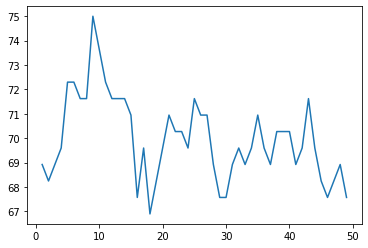

In [ ]:
import matplotlib.pylab as plt

lists = sorted(Accuracy.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred= knn.predict(X_test) 
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(Y_test,y_pred)

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        95
           1       0.67      0.58      0.63        53

    accuracy                           0.75       148
   macro avg       0.73      0.71      0.72       148
weighted avg       0.74      0.75      0.75       148



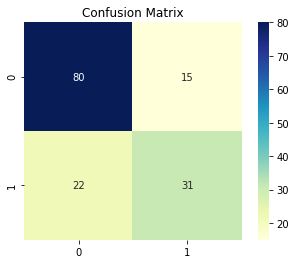

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Confusion Matrix')
axs=sns.heatmap(cm,cmap='YlGnBu',annot=True,square=True)
#axs.invert_yaxis()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
estimator = [] 
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('RFC',RandomForestClassifier(n_estimators=50, random_state=1)))

In [ ]:
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(X_train, Y_train) 
y_pred = vot_hard.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
vot_hard.score(X_train,Y_train)

0.9796264855687606

In [ ]:
vot_hard.score(X_test,Y_test)

0.8243243243243243

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
134,1,1,32,0,0,84,2
36,2,1,30,0,0,16,0
296,2,1,29,0,0,16,0
423,2,0,35,1,1,91,2
808,1,1,51,0,0,84,2
...,...,...,...,...,...,...,...
495,2,1,30,0,0,93,0
16,2,1,5,4,1,148,1
603,2,1,57,0,0,42,2
559,2,0,47,1,0,108,2


In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
462,0,1,61,0,0,165,2
817,1,1,40,1,1,164,0
621,0,1,55,1,0,182,2
878,2,1,30,0,0,39,2
413,1,1,30,0,0,0,2
...,...,...,...,...,...,...,...
707,0,1,55,0,0,138,2
542,2,0,14,4,2,155,2
259,1,0,64,0,1,135,2
656,2,1,30,0,0,39,2


In [ ]:
df1 = pd.read_csv('test.csv')

In [ ]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df1['Age'].fillna(0,inplace=True) 
df1['Age'].astype(int).mean()

24.019138755980862

In [ ]:
df1['Age']=df1['Age'].replace(to_replace=0,value=24)

In [ ]:
df1['Pclass'] = label_encoder.fit_transform(df1['Pclass'])

df1['Age'] = label_encoder.fit_transform(df1['Age'])

df1['SibSp'] = label_encoder.fit_transform(df1['SibSp'])

df1['Parch'] = label_encoder.fit_transform(df1['Parch'])

df1['Fare'] = label_encoder.fit_transform(df1['Fare'])

df1['Sex'] = label_encoder.fit_transform(df1['Sex'])

df1['Embarked'] = label_encoder.fit_transform(df1['Embarked'])

In [ ]:
X_final=df1.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [ ]:
final=vot_hard.predict(X_final)

In [ ]:
output=pd.DataFrame({'PassengerId':df1['PassengerId'],'Survived':final})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
output.to_csv('submission.csv', index=False)